# Using the webcam to capture an image in python

This code just illustrates how python captures an image from the webcam and then displays it. To achieve this, the opencv2 library is being used. The image captured using `cv2` is in BGR `frame[:,:,::-1]` converts it to RGB so that it is displayed correctly.

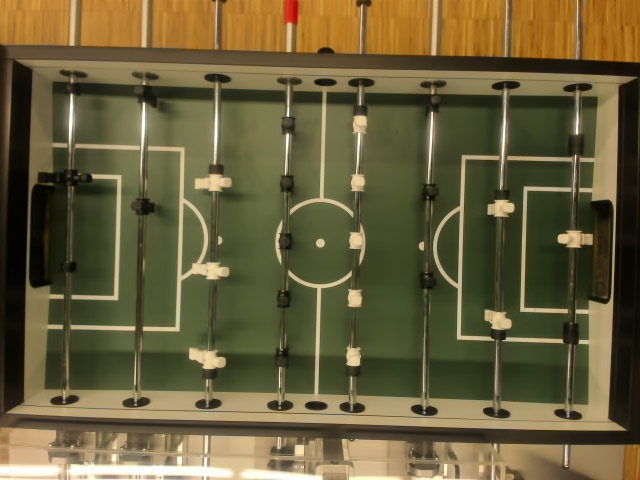

In [20]:
import cv2
from PIL import Image
import numpy as np

video = cv2.VideoCapture(1)
error, frame = video.read()
Image.fromarray(frame[:,:,::-1])

# Determine the frame rate without analyzing the neural net

The following code determines the basic frame rate, that can be achieved by using python and fetching the camera stream.

In [4]:
import time
time_start = time.time()

count = 180

for _ in range(count):
    video.read()

print('FPS {}'.format(float(count) / (time.time() - time_start)))

FPS 30.4485377074


# Determining the frame rate using the neural net

In order to use the neural net, we first need to set up some initialization code. Then we can use it to determine the possible frame rate.

In [8]:
from kicker.neural_net import NeuralNet
nn = NeuralNet(24, (320, 480, 2))

The playing field is extracted using the following routine.

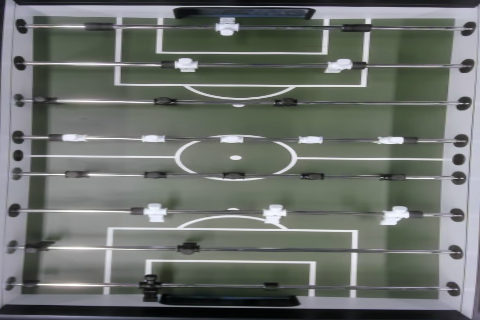

In [23]:
from kicker.image import Analyzer
import yaml

with open('config.yml', 'r') as f:
    config =  yaml.load(f)
    
analyzer = Analyzer(config)
Image.fromarray(analyzer.extract_table(frame, (480, 320)))

We are now ready to measure the FPS while applying the neural net.

In [22]:
time_start = time.time()

count = 180

for _ in range(count):
    error, frame = video.read()
    table_frame = analyzer.extract_table(frame, (480, 320))
    nn.predict_single(table_frame[:,:,:2].reshape((1, 480, 320, 2)))

print('FPS {}'.format(float(count) / (time.time() - time_start)))

FPS 21.3966621676
